Importing modules


In [26]:
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

loading the data and printing the first 5 images as well as a description of the data


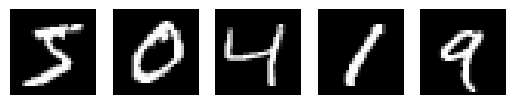

In [22]:
mnist = fetch_openml("mnist_784", version=1)
x = DataFrame(mnist.data)
y = DataFrame(mnist.target).values.ravel()
x = x.iloc[:2000, :]
y = y[:2000]
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x.loc[i].values.reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()

spliting data into 80% train and 20% test and creating a knn model with k=3 and k=5
,we also gonna create a decision tree and logistic regression models for comparison


In [23]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=42, test_size=0.2)
models = [
    ("knn with k=3", KNeighborsClassifier(n_neighbors=3)),
    ("knn with k=5", KNeighborsClassifier(n_neighbors=5)),
    ("Logistic regression", LogisticRegression(max_iter=1000)),
    ("Decision tree", DecisionTreeClassifier()),
]

we gonna loop over the list of models train , test and calculating the accuracy , confusion matrix of each model.


knn with k=3
accuarcy 0.88
confusion_matrix :
[[39  0  1  1  0  0  1  0  0  1]
 [ 1 53  2  1  2  1  0  2  3  0]
 [ 0  0 25  0  0  0  0  0  1  1]
 [ 0  0  0 34  0  4  0  0  2  1]
 [ 0  0  2  0 38  1  0  1  0  5]
 [ 0  0  0  0  1 33  1  0  1  0]
 [ 0  0  0  0  1  1 33  0  0  1]
 [ 0  0  2  0  0  0  0 34  0  0]
 [ 0  0  0  1  0  0  0  0 22  0]
 [ 0  0  0  1  0  0  0  3  1 41]]
knn with k=5
accuarcy 0.8825
confusion_matrix :
[[38  0  2  1  0  0  2  0  0  1]
 [ 1 53  2  1  2  0  0  2  3  0]
 [ 0  0 24  0  0  0  0  0  1  1]
 [ 0  0  0 33  0  4  0  0  1  1]
 [ 0  0  2  0 39  1  0  2  0  2]
 [ 1  0  0  0  1 32  1  0  0  0]
 [ 0  0  0  0  0  3 32  0  0  1]
 [ 0  0  2  1  0  0  0 34  0  0]
 [ 0  0  0  1  0  0  0  0 25  1]
 [ 0  0  0  1  0  0  0  2  0 43]]
Logistic regression
accuarcy 0.8625
confusion_matrix :
[[34  0  0  0  0  0  1  0  0  0]
 [ 0 51  0  0  0  1  0  0  3  0]
 [ 1  2 29  1  1  1  0  1  1  1]
 [ 1  0  0 33  0  3  0  0  0  1]
 [ 0  0  1  0 38  0  0  1  0  3]
 [ 1  0  0  2  0 28  1  

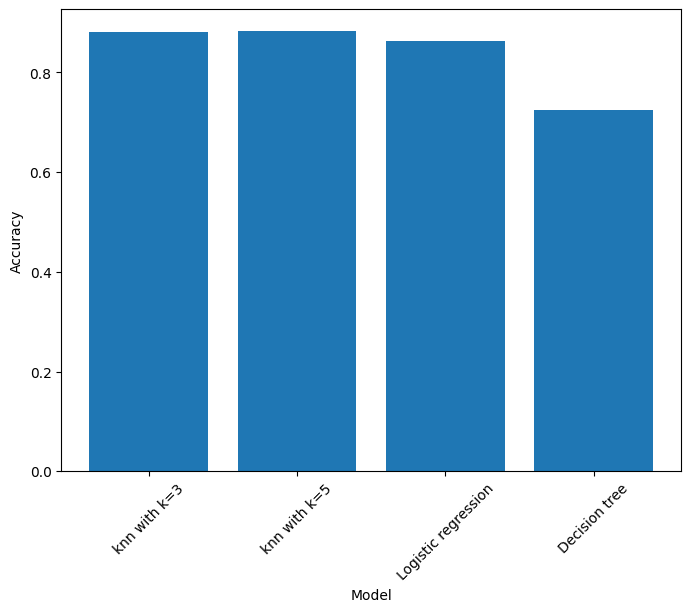

In [38]:
accuracies = []

for name, model in models:
    print(name)
    model.fit(xTrain, yTrain)
    pred = model.predict(xTest)
    accuracy = accuracy_score(pred, yTest)
    print("accuarcy " + str(accuracy))    
    accuracies.append(accuracy)    
    confusionMatrix = confusion_matrix(pred, yTest)
    print("confusion_matrix :\n" + str(confusionMatrix)) 
    confusionMatrices.append(confusionMatrix)
    
plt.figure(figsize=(8, 6))
plt.bar([model[0] for model in models], accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


The KNN model with k=3 achieved the highest accuracy of 0.88, followed by the KNN model with k=5 at 0.8825. The Logistic Regression model had an accuracy of 0.8625, while the Decision Tree model performed the worst with an accuracy of 0.725. 